In [1]:
import sys, os

sys.path.append(os.path.abspath(os.path.join('..', '..',)))

import autonormalize as an
import featuretools as ft

In [2]:
df = ft.demo.load_mock_customer(n_customers=80, n_products=50, n_sessions=200, 
                                n_transactions=10000, return_single_table=True)
df

,transaction_id,session_id,transaction_time,product_id,amount,customer_id,device,session_start,zip_code,join_date,date_of_birth,brand
0,9202,1,2014-01-01 00:00:00,36,81.46,8,desktop,2014-01-01 00:00:00,13244,2013-05-07 20:59:29,1973-07-28,A
1,5776,1,2014-01-01 00:01:05,36,107.59,8,desktop,2014-01-01 00:00:00,13244,2013-05-07 20:59:29,1973-07-28,A
2,1709,1,2014-01-01 00:32:30,36,57.57,8,desktop,2014-01-01 00:00:00,13244,2013-05-07 20:59:29,1973-07-28,A
3,9472,72,2014-01-03 16:36:10,36,95.89,8,mobile,2014-01-03 15:55:00,13244,2013-05-07 20:59:29,1973-07-28,A
4,7763,72,2014-01-03 16:39:25,36,115.46,8,mobile,2014-01-03 15:55:00,13244,2013-05-07 20:59:29,1973-07-28,A
5,5445,123,2014-01-05 13:25:00,36,86.06,8,desktop,2014-01-05 13:14:10,13244,2013-05-07 20:59:29,1973-07-28,A
6,6844,123,2014-01-05 14:05:05,36,115.11,8,desktop,2014-01-05 13:14:10,13244,2013-05-07 20:59:29,1973-07-28,A
7,5668,131,2014-01-05 21:00:00,36,106.50,8,tablet,2014-01-05 20:48:05,13244,2013-05-07 20:59:29,1973-07-28,A
8,7354,131,2014-01-05 21:11:55,36,100.95,8,tablet,2014-01-05 20:48:05,13244,2013-05-07 20:59:29,1973-07-28,A
9,4108,199,2014-01-08 10:39:35,36,45.26,73,tablet,2014-01-08 10:39:35,13244,2013-11-10 02:00:18,1976-03-05,A


In [3]:
df.dtypes

transaction_id               int64
session_id                   int64
transaction_time    datetime64[ns]
product_id                category
amount                     float64
customer_id                  int64
device                      object
session_start       datetime64[ns]
zip_code                    object
join_date           datetime64[ns]
date_of_birth       datetime64[ns]
brand                       object
dtype: object

In [4]:
deps = an.find_dependencies(df)

100%|██████████| 10/10 [00:13<00:00,  1.51s/it]


In [5]:
print(deps)

 {transaction_time}  --> transaction_id
 {amount,join_date}  {amount,date_of_birth}  {transaction_id}  {amount,product_id}  {session_start}  {amount,customer_id}  {transaction_time}  --> session_id
 {transaction_id}  --> transaction_time
 {amount,join_date}  {amount,date_of_birth}  {amount,session_id}  {transaction_id}  {amount,device,brand,zip_code}  {amount,session_start}  {amount,customer_id}  {transaction_time}  --> product_id
 {transaction_id}  {transaction_time}  --> amount
 {date_of_birth}  {session_id}  {transaction_id}  {amount,product_id}  {join_date}  {session_start}  {transaction_time}  --> customer_id
 {session_id}  {amount,join_date}  {amount,date_of_birth}  {transaction_id}  {amount,product_id}  {session_start}  {amount,customer_id}  {transaction_time}  --> device
 {session_id}  {amount,join_date}  {amount,date_of_birth}  {transaction_id}  {amount,product_id}  {amount,customer_id}  {transaction_time}  --> session_start
 {date_of_birth}  {session_id}  {transaction_id}  {a

In [6]:
entityset = an.make_entityset(df, deps, name="Customer Transactions", time_index='transaction_time')

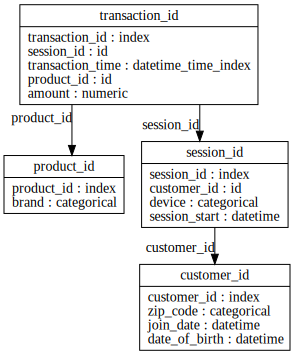

In [7]:
entityset.plot()

In [8]:
fm, features = ft.dfs(entityset=entityset, target_entity='session_id')
features

[<Feature: customer_id>,
 <Feature: device>,
 <Feature: SUM(transaction_id.amount)>,
 <Feature: STD(transaction_id.amount)>,
 <Feature: MAX(transaction_id.amount)>,
 <Feature: SKEW(transaction_id.amount)>,
 <Feature: MIN(transaction_id.amount)>,
 <Feature: MEAN(transaction_id.amount)>,
 <Feature: COUNT(transaction_id)>,
 <Feature: NUM_UNIQUE(transaction_id.product_id)>,
 <Feature: MODE(transaction_id.product_id)>,
 <Feature: DAY(session_start)>,
 <Feature: YEAR(session_start)>,
 <Feature: MONTH(session_start)>,
 <Feature: WEEKDAY(session_start)>,
 <Feature: customer_id.zip_code>,
 <Feature: NUM_UNIQUE(transaction_id.DAY(transaction_time))>,
 <Feature: NUM_UNIQUE(transaction_id.YEAR(transaction_time))>,
 <Feature: NUM_UNIQUE(transaction_id.MONTH(transaction_time))>,
 <Feature: NUM_UNIQUE(transaction_id.WEEKDAY(transaction_time))>,
 <Feature: NUM_UNIQUE(transaction_id.product_id.brand)>,
 <Feature: MODE(transaction_id.DAY(transaction_time))>,
 <Feature: MODE(transaction_id.YEAR(transacti

In [12]:
str(entityset.relationships[0])

'<Relationship: transaction_id.session_id -> session_id.session_id>'